In [2]:
!pip install pandas
!pip install nltk
!pip install -U scikit-learn


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)
     |████████████████████████████████| 9.6 MB 2.7 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
# Getting the dataset

fields=['target','ids','date','query','user','text']
df = pd.read_csv("tweetsentimentdata.csv", encoding="ISO-8859-1", names=fields)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   query   1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [5]:
df.head(5)

,target,ids,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
df.tail(5)

,target,ids,date,query,user,text
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [7]:
# Removing unnecessary columns
df = df[['target', 'text']]
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   text    1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


Negative    800000
Positive    800000
Name: target, dtype: int64


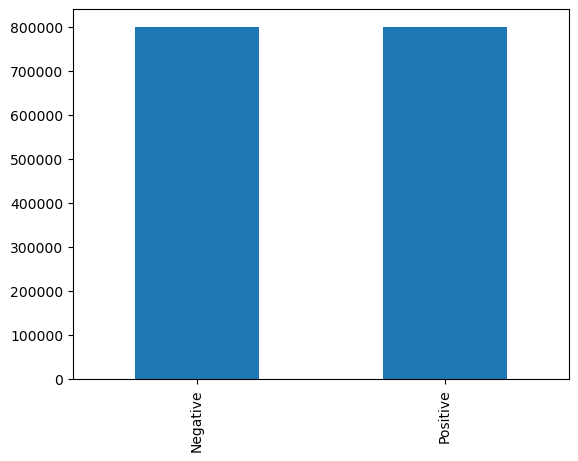

In [9]:
# Visualize the data sentiment distribution
sentiments = {0: "Negative", 4: "Positive"}
print(df.target.apply(lambda x: sentiments[x]).value_counts())
df.target.apply(lambda x: sentiments[x]).value_counts().plot(kind = 'bar')
plt.show()

In [10]:
# Clean the text data: 
# remove usernames, urls, hashtags, numbers and dates
# downcast
# remove stopwords 
# stopwords -> words that do not add much meaning to a sentence, such as 'the', 'have', 'she'


# remove usernames, urls, hashhtags and numbers

# patterns
url = r'https?:\/\/[\w\-\.]+\.[a-zA-Z]{2,}\/?\S*'
username = r'@\w+'
hashtag = r'#\w+'
dates = r'\d{4}-\d{2}-\d{2}'


df['text'] = df['text'].replace(to_replace=r'\d+', value='', regex=True)
df['text'] = df['text'].replace(to_replace=url, value='', regex=True)
df['text'] = df['text'].replace(to_replace=username, value='', regex=True)
df['text'] = df['text'].replace(to_replace=hashtag, value='', regex=True)
df['text'] = df['text'].replace(to_replace=dates, value='', regex=True)


# lowercase text
df['text'] = df['text'].astype('category')

df.head(5)



,target,text
0,0,"- Awww, that's a bummer. You shoulda got Da..."
1,0,is upset that he can't update his Facebook by ...
2,0,I dived many times for the ball. Managed to s...
3,0,my whole body feels itchy and like its on fire
4,0,"no, it's not behaving at all. i'm mad. why am..."


In [11]:
# Remove stopwords. Using nltk library to remove stopwords
# nltk.download('stopwords')

# getting stopwords
stop_words = set(stopwords.words('english'))

df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

df.head(5)


,target,text
0,0,"- Awww, that's bummer. shoulda got David Carr ..."
1,0,upset can't update Facebook texting it... migh...
2,0,dived many times ball. Managed save % rest go ...
3,0,whole body feels itchy like fire
4,0,"no, behaving all. i'm mad. here? can't see there."


In [12]:
# Splitting the data. 90% training data, 10% test data
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'],
                                                    test_size = 0.1, random_state = 0)

X_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 160000 entries, 557138 to 800335
Series name: text
Non-Null Count   Dtype 
--------------   ----- 
160000 non-null  object
dtypes: object(1)
memory usage: 2.4+ MB


In [ ]:
# Vectorize the data. 
# Vectorization -> process of transformaing text data into a numerical representation that can be used by models
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)